In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Load dataset
data_path = '../data/processed/combined_lyrics.csv'
df = pd.read_csv(data_path)

In [3]:
# View first few rows
df.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0.0,Dua Lipa,New Rules,Dua Lipa,2017.0,2017-06-02,one one one one one talkin' in my sleep at n...
1,1.0,Dua Lipa,Don’t Start Now,Future Nostalgia,2019.0,2019-11-01,if you don't wanna see me did a full 80 craz...
2,2.0,Dua Lipa,IDGAF,Dua Lipa,2017.0,2017-06-02,you call me all friendly tellin' me how much y...
3,3.0,Dua Lipa,Blow Your Mind (Mwah),Dua Lipa,2016.0,2016-08-26,i know it's hot i know we've got something tha...
4,4.0,Dua Lipa,Be the One,Dua Lipa,2015.0,2015-10-30,i see the moon i see the moon i see the moon o...


In [4]:
# Drop column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
print(f"Shape of data = {df.shape}")
print(f"Columns = {df.columns.tolist()}")

Shape of data = (6027, 6)
Columns = ['Artist', 'Title', 'Album', 'Year', 'Date', 'Lyric']


In [6]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Artist  6027 non-null   object 
 1   Title   6027 non-null   object 
 2   Album   4453 non-null   object 
 3   Year    4278 non-null   float64
 4   Date    4278 non-null   object 
 5   Lyric   5981 non-null   object 
dtypes: float64(1), object(5)
memory usage: 282.6+ KB


In [7]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Artist       0
Title        0
Album     1574
Year      1749
Date      1749
Lyric       46
dtype: int64


In [8]:
# Distribution of Songs per Artist
artist_counts = df['Artist'].value_counts()
print(artist_counts)

Artist
Eminem           521
Taylor Swift     479
Drake            466
Beyoncé          406
Rihanna          405
Lady Gaga        402
Justin Bieber    348
Coldplay         344
Katy Perry       325
Nicki Minaj      323
Ariana Grande    308
Ed Sheeran       296
BTS (방탄소년단)      278
Dua Lipa         247
Maroon 5         197
Selena Gomez     175
Post Malone      148
Billie Eilish    145
Cardi B           75
Charlie Puth      75
Khalid            64
Name: count, dtype: int64


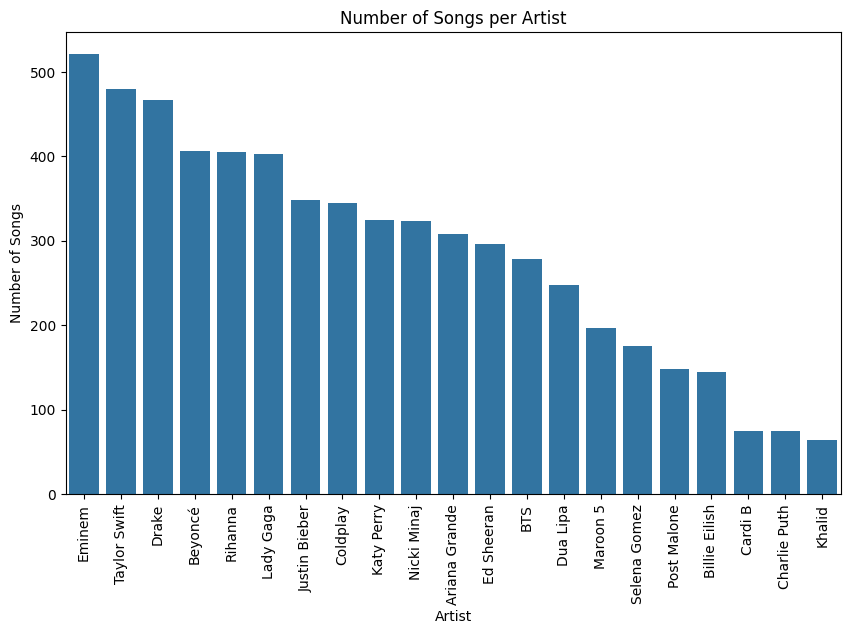

In [9]:
# Replace non-Latin characters in the 'Artist' column and Recalculate artist counts and plot
df['Artist'] = df['Artist'].replace({"BTS (방탄소년단)": "BTS"})
artist_counts = df['Artist'].value_counts()

# Plot number of songs per artist
plt.figure(figsize=(10,6))
sns.barplot(x=artist_counts.index, y=artist_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Songs per Artist")
plt.xlabel("Artist")
plt.ylabel("Number of Songs")
plt.savefig("../plots/songs_per_artist.png", bbox_inches='tight')
plt.show()

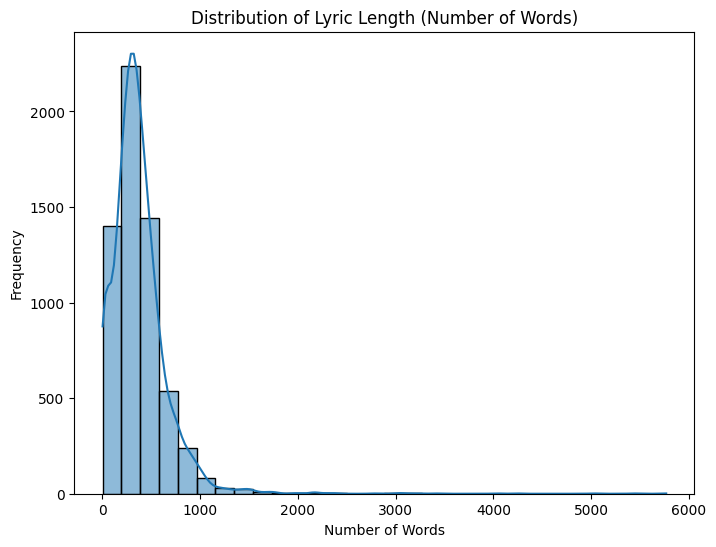

In [10]:
# Analyzing the length of lyrics
df['Lyric_Length'] = df['Lyric'].apply(lambda x: len(str(x).split()))   # Count number of words in each lyric

# Plot distribution of lyrics lengths
plt.figure(figsize=(8, 6))
sns.histplot(df['Lyric_Length'], bins=30, kde=True)
plt.title("Distribution of Lyric Length (Number of Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.savefig("../plots/distribution_of_lyrics_length.png", bbox_inches="tight")
plt.show()

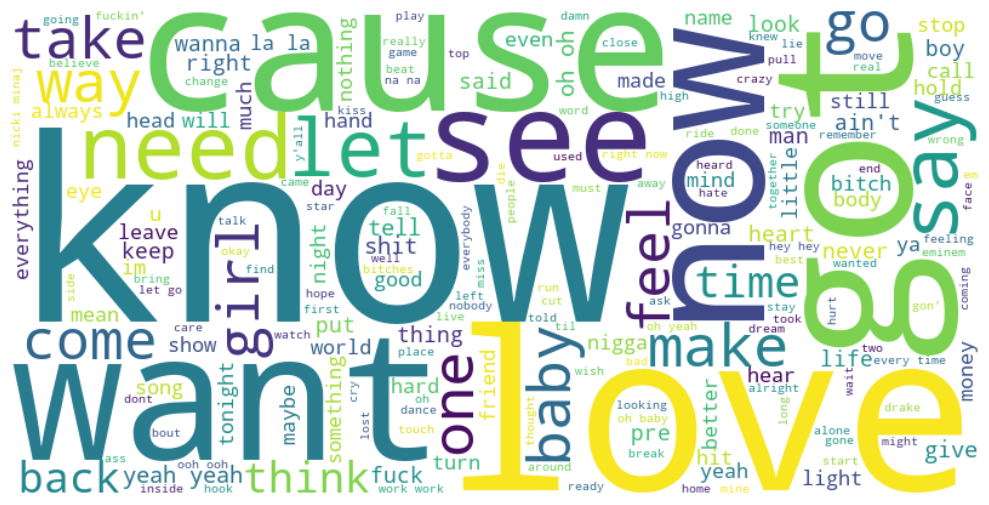

In [11]:
# Combine all lyrics into one string
all_lyrics = " ".join(df['Lyric'].astype('str'))

# Define stopwords (use default or add custom stopwords)
stopwords = set(STOPWORDS)

# Generate WordCloud excluding stopwords
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_lyrics)

# Display WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()  # Ensure the plot is properly adjusted
plt.savefig('../plots/wordcloud.png', bbox_inches='tight')
plt.show()

## Conclusion

### Data Overview:
- The dataset consists of **6 major columns**: `Artist`, `Title`, `Album`, `Year`, `Date`, and `Lyric`, with a total of **6027 rows**.
- Key columns like Album, Year, and Date have missing values, while the Lyric column has only **46 missing entries**.
- Most artists in the dataset have a significant number of songs, with **Eminem, Taylor Swift, and Drake** having the most entries.

### Key Findings:
- **Artist Distribution:** Artists like Eminem, Taylor Swift, and Drake have the highest representation, while artists like Khalid and Charlie Puth have fewer songs in the dataset.
- **Lyric Length:** Lyrics vary in length across songs, which was explored through the distribution of word counts.
- **WordCloud:** A visualization of frequently occurring words in the dataset was created, offering insights into common terms used in song lyrics.